In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
train = pd.read_csv('./drive/MyDrive/LG_Aimer/train.csv')
test = pd.read_csv('./drive/MyDrive/LG_Aimer/test.csv')
meta_x_features= pd.read_csv('./drive/MyDrive/LG_Aimer/meta/x_feature_info.csv')
meta_y_features= pd.read_csv('./drive/MyDrive/LG_Aimer/meta/y_feature_info.csv')

from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
import random
import os
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED']=str(seed)
    np.random.seed(seed)
seed_everything(42)

In [19]:
meta_x_features

,Feature,설명
0,X_01,PCB 체결 시 단계별 누름량(Step 1)
1,X_02,PCB 체결 시 단계별 누름량(Step 2)
2,X_03,방열 재료 1 무게
3,X_04,1차 검사 통과 여부
4,X_05,PCB 체결 시 단계별 누름량(Step 3)
5,X_06,PCB 체결 시 단계별 누름량(Step 4)
6,X_07,방열 재료 1 면적
7,X_08,방열 재료 2 면적
8,X_09,방열 재료 3 면적
9,X_10,방열 재료 2 무게


In [4]:
df = pd.read_csv('./drive/MyDrive/LG_Aimer/train.csv')

In [5]:
df1 = df.copy()
df1=df[(df['Y_01']>=0.2)&(df['Y_01']<2.0)&(df['Y_02']>=0.2)
&(df['Y_02']<=2.1)&(df['Y_02']>=0.2)
&(df['Y_03']>=0.2)&(df['Y_03']<=2.1)
&(df['Y_04']<=19)&(df['Y_04']>=7)&(df['Y_05']<=36.5)&(df['Y_05']>=22)
&(df['Y_06']>=-19.2)&(df['Y_06']<=19)&(df['Y_07']>=2.4)&(df['Y_07']<=4)
&(df['Y_08']>=-29.2)&(df['Y_08']<=-24)&(df['Y_09']>=-29.2)&(df['Y_09']<=-24)
&(df['Y_10']>=-30.6)&(df['Y_10']<=-20)&(df['Y_11']>=19.6)&(df['Y_11']<=26.6)
&(df['Y_12']>=-29.2)&(df['Y_12']<=-24)&(df['Y_13']>=-29.2)&(df['Y_13']<=-24)
&(df['Y_14']>=-29.2)&(df['Y_14']<=-24)]
len(df1.index)

35687

In [6]:
for idx in range(0,39607):
    if idx in df1.index:
        df.loc[idx,'pass']=1
    else:
        df.loc[idx,'pass']=0
df['pass'].value_counts()

1.0    35687
0.0     3920
Name: pass, dtype: int64

In [7]:
df[['X_19','X_20','X_21','X_22','pass']]

,X_19,X_20,X_21,X_22,pass
0,3.11,3.17,3.06,3.13,0.0
1,2.97,3.11,2.91,3.20,1.0
2,3.04,3.04,3.01,3.12,1.0
3,3.05,3.01,3.02,3.08,1.0
4,3.04,3.07,3.00,3.12,1.0
...,...,...,...,...,...
39602,3.20,3.03,3.06,3.13,1.0
39603,3.15,3.06,3.05,3.06,1.0
39604,3.23,3.09,3.07,3.12,1.0
39605,3.18,3.01,3.15,3.09,0.0


In [8]:
max = df.loc[:,['X_19','X_20','X_21','X_22']].max(axis=1)
min = df.loc[:,['X_19','X_20','X_21','X_22']].min(axis=1)
df['X_60'] = max-min

In [20]:
max = df.loc[:,['X_30','X_31','X_32','X_33']].max(axis=1)
min = df.loc[:,['X_30','X_31','X_32','X_33']].min(axis=1)
df['X_61'] = max-min

In [21]:
df['X_60']

0        0.11
1        0.29
2        0.11
3        0.07
4        0.12
         ... 
39602    0.17
39603    0.10
39604    0.16
39605    0.17
39606    0.08
Name: X_60, Length: 39607, dtype: float64

In [22]:
df_pass = df[df['pass']==1.0]    
df_nonpass = df[df['pass']==0.0]

In [23]:
cor_pass = df_pass.corr(method='pearson')
xycor_pass = cor_pass.drop(columns=['X_04', 'X_23', 'X_47', 'X_48','pass']).filter(regex='X').filter(regex='Y', axis=0)

In [24]:
xycor_pass

,X_01,X_02,X_03,X_05,X_06,X_07,X_08,X_09,X_10,X_11,...,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,X_60,X_61
Y_01,0.027759,-0.010252,0.013305,-0.007035,0.047784,-0.020896,0.005812,0.019447,0.011550,0.011040,...,0.041419,0.035416,0.059618,0.056278,0.045381,0.031868,0.033577,0.041459,0.037159,-0.035534
Y_02,0.033695,-0.012685,0.082125,-0.009185,0.063233,-0.003012,0.013344,-0.017605,0.004137,0.003527,...,0.036287,0.025577,0.042687,0.025481,0.030945,0.024554,-0.005061,0.030448,0.052061,-0.037958
Y_03,-0.009042,-0.005891,0.011304,-0.039180,0.036112,0.001577,0.015001,0.009137,0.014009,0.010121,...,0.044687,0.024476,0.041266,0.031753,0.022947,0.023564,0.017986,0.035477,0.041819,-0.017662
Y_04,0.051798,-0.001694,0.009247,0.039808,0.038073,-0.001310,-0.017187,0.002042,-0.005632,-0.004913,...,0.010432,0.028365,0.027173,0.020810,0.024608,-0.023356,-0.012113,0.014058,-0.000356,-0.018496
Y_05,0.004859,-0.010772,0.000309,-0.002596,0.017262,-0.003835,-0.001120,0.025756,-0.004727,-0.004466,...,0.028620,0.030809,0.024695,0.017554,0.029954,-0.007138,-0.002502,0.041201,0.010283,0.014028
Y_06,-0.010972,-0.005073,0.013505,0.002048,-0.000339,-0.002255,-0.008065,-0.016196,-0.014431,-0.014029,...,0.006547,0.031570,0.031488,0.027909,0.024001,0.012182,0.005599,0.028438,-0.001239,0.030750
Y_07,-0.033514,0.008503,-0.009644,-0.017774,-0.025913,0.004878,0.008340,-0.006011,0.003363,-0.000761,...,-0.024205,-0.018372,-0.014913,0.013659,-0.001584,0.016428,0.018777,-0.013034,-0.020757,0.002352
Y_08,0.072795,-0.013660,0.132478,0.035170,0.078916,-0.015576,-0.003006,-0.001123,-0.017501,-0.017821,...,0.007959,0.007798,0.048508,0.013531,0.044136,0.002543,-0.037488,0.002961,0.008089,-0.051200
Y_09,0.068063,-0.014891,0.119779,0.033355,0.072506,-0.018072,-0.003703,-0.001161,-0.015753,-0.016313,...,0.007782,0.009572,0.047788,0.013867,0.043318,0.002906,-0.034367,0.002887,0.004791,-0.045135
Y_10,0.037199,-0.008003,0.143472,-0.009537,0.083534,-0.015499,0.009945,0.035225,-0.009460,-0.009570,...,0.058905,0.023601,0.069555,0.027470,0.054885,0.007345,-0.020392,0.031544,0.037621,-0.079087


In [25]:
cor_threshold = 0.5
cor_pass_abs = xycor_pass.abs()
cor_s = cor_pass_abs.unstack()
print(cor_s)

X_01  Y_01    0.027759
      Y_02    0.033695
      Y_03    0.009042
      Y_04    0.051798
      Y_05    0.004859
                ...   
X_61  Y_10    0.079087
      Y_11    0.019655
      Y_12    0.047788
      Y_13    0.049232
      Y_14    0.046721
Length: 756, dtype: float64


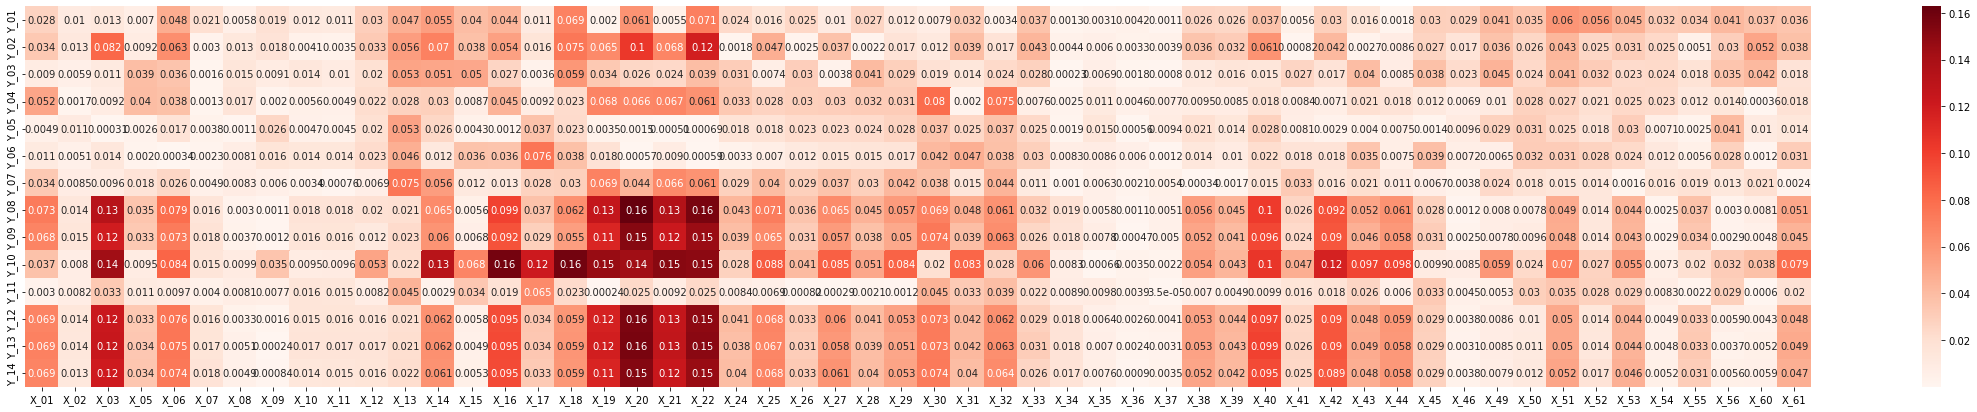

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40,7)
sns.heatmap(xycor_pass.abs(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Reds', #색상
          )

In [27]:
cor_nonpass = df_nonpass.corr(method='pearson')
xycor_nonpass = cor_nonpass.drop(columns=['X_04', 'X_23', 'X_47', 'X_48','pass']).filter(regex='X').filter(regex='Y', axis=0)

In [28]:
xycor_nonpass

,X_01,X_02,X_03,X_05,X_06,X_07,X_08,X_09,X_10,X_11,...,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,X_60,X_61
Y_01,0.059625,0.010801,0.004305,0.040315,0.023686,-0.026332,0.022583,0.018418,-0.005631,0.004100,...,0.051920,0.043948,0.053857,0.072428,0.043950,0.039755,0.018758,0.056246,0.046964,-0.035628
Y_02,0.055117,-0.005077,0.048878,0.035463,0.028663,-0.023449,0.020695,0.003658,0.013518,0.014244,...,0.033716,0.016713,0.029941,0.042235,0.018153,0.030302,-0.001616,0.044686,0.070627,-0.043228
Y_03,0.036999,0.007883,0.011001,0.024795,0.021222,-0.024640,0.016459,0.017958,0.001240,0.007053,...,0.046878,0.023682,0.034268,0.051194,0.028286,0.032374,0.009127,0.048921,0.051440,-0.024263
Y_04,0.054201,0.003687,0.003489,0.026435,0.041194,-0.017083,-0.021965,-0.017280,-0.015835,-0.005050,...,0.037710,0.038596,0.049307,0.016244,0.016068,-0.025446,-0.049545,0.020252,-0.003559,-0.005478
Y_05,0.045301,0.004140,0.013479,-0.004597,0.053569,0.001543,-0.005894,-0.004279,-0.027212,-0.010283,...,0.018580,0.035480,0.044246,0.015914,-0.006449,-0.019097,-0.042447,0.036627,0.032336,0.036404
Y_06,-0.025730,-0.008567,-0.135891,0.038827,-0.110129,-0.027851,0.010033,0.065395,-0.000012,0.002990,...,0.064842,0.059406,0.043958,0.042952,0.038635,0.064697,0.049465,0.083876,-0.005049,0.022148
Y_07,-0.067942,-0.017124,-0.082746,-0.024168,-0.063689,-0.002950,-0.004060,0.046430,0.015396,0.012217,...,0.028255,0.011440,0.045913,0.071134,0.062409,0.079895,0.128052,0.036150,-0.062101,-0.008381
Y_08,0.055680,-0.011711,0.041977,0.020396,0.040989,-0.018957,-0.021238,0.025794,-0.022638,-0.002597,...,0.025273,0.046939,0.072463,0.050259,0.035301,0.013429,-0.012310,0.059106,0.021893,-0.024502
Y_09,0.045768,-0.010246,0.037214,0.013301,0.036879,-0.015465,-0.022717,0.021528,-0.019218,0.001830,...,0.026993,0.039896,0.065075,0.048915,0.029183,0.008477,-0.009145,0.052235,0.016140,-0.016843
Y_10,0.014680,-0.008983,-0.032507,0.026995,-0.029175,-0.032852,0.001779,0.072616,-0.014565,-0.002512,...,0.075996,0.073111,0.076903,0.061150,0.059378,0.051687,0.027171,0.098841,0.020355,-0.021478


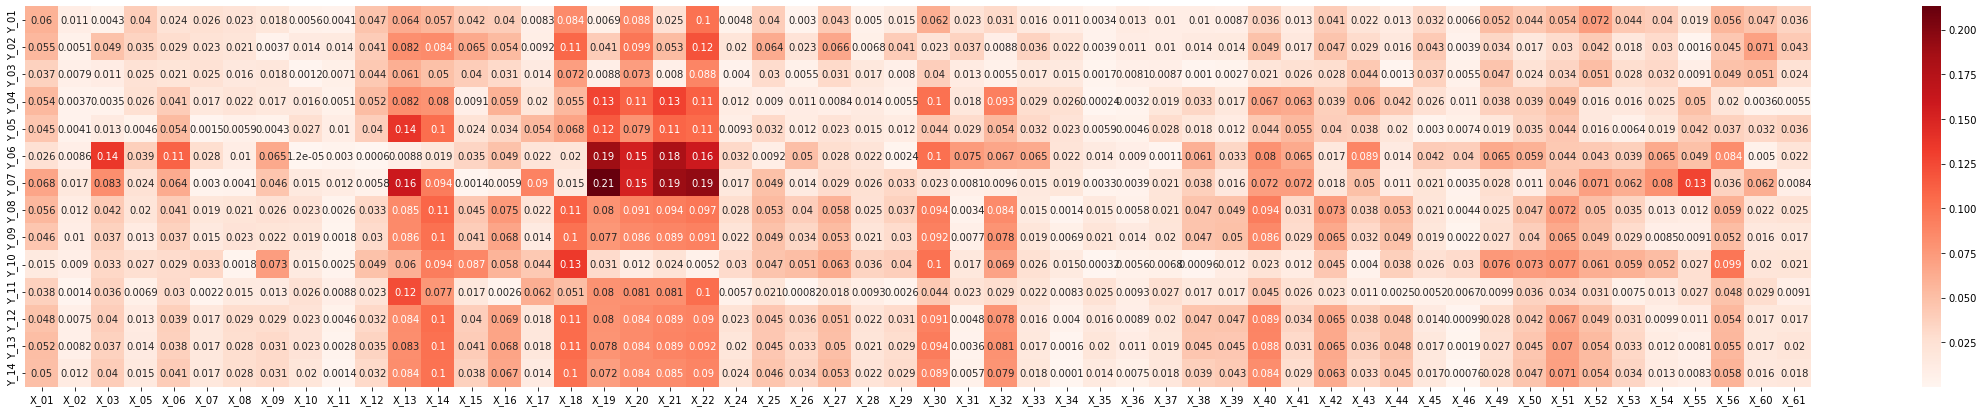

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40,7)
sns.heatmap(xycor_nonpass.abs(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Reds', #색상
          )

In [30]:
df_pass = df[df['pass']==1.0]    
df_nonpass = df[df['pass']==0.0]

In [31]:
drop_sensors = ['ID','X_04', 'X_23', 'X_47', 'X_48','Y_01', 'Y_02', 'Y_03', 'Y_04', 'Y_05', 'Y_06', 'Y_07', 'Y_08', 'Y_09',
       'Y_10', 'Y_11', 'Y_12', 'Y_13', 'Y_14','pass']
df_pass = df_pass.drop(labels = drop_sensors,axis=1, inplace=False)
df_nonpass = df_nonpass.drop(labels = drop_sensors,axis=1, inplace=False)
print(df_pass.shape, df_nonpass.shape)

(35687, 54) (3920, 54)


In [32]:
df_pass

,X_01,X_02,X_03,X_05,X_06,X_07,X_08,X_09,X_10,X_11,...,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,X_60,X_61
1,69.524,103.321,65.17,101.944,72.943,28.73,61.23,233.61,0.0,0.0,...,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308,0.29,0.22
2,72.583,103.320,64.07,103.153,72.943,28.81,105.77,272.20,0.0,0.0,...,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232,0.11,0.23
3,71.563,103.320,67.57,101.971,77.022,28.92,115.21,255.36,0.0,0.0,...,15007.03,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225,0.07,0.21
4,69.524,103.320,63.57,101.981,70.904,29.68,103.38,241.46,0.0,0.0,...,11051.03,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762,0.12,0.35
5,69.524,103.320,62.77,101.899,69.884,27.90,64.97,241.85,0.0,0.0,...,9514.23,137.649365,124.373890,145.751970,121.860937,127.081180,139.840405,123.946308,0.06,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39601,64.425,103.320,63.87,102.037,68.864,30.40,99.99,199.55,0.0,0.0,...,60707.83,128.922673,128.715023,137.359163,125.521040,130.121288,138.584111,121.000820,0.08,0.37
39602,66.465,103.320,62.27,103.150,66.825,30.20,77.83,298.05,0.0,0.0,...,60630.73,129.965741,130.807148,133.481737,125.273130,121.780933,133.780110,129.029812,0.17,0.31
39603,66.465,103.321,62.77,102.021,66.825,29.21,102.25,270.67,0.0,0.0,...,60763.43,127.633885,120.158764,142.667802,122.465490,122.987209,143.090741,122.811413,0.10,0.40
39604,68.504,103.320,64.67,103.144,68.864,29.96,102.61,198.07,0.0,0.0,...,8813.33,132.501286,136.893025,134.419328,129.115431,130.920147,140.489232,119.166699,0.16,0.24


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pass_scaled = scaler.fit_transform(df_pass)
df_pass_scaled = pd.DataFrame(pass_scaled, index=df_pass.index,columns = df_pass.columns)

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vvif = pd.DataFrame()
vvif["VIF Factor"] = [variance_inflation_factor(df_pass_scaled.values,i) for i in range(df_pass_scaled.shape[1])]
vvif["features"] = df_pass_scaled.columns
vvvif = vvif[vvif['VIF Factor']>=5]
vvvif

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,VIF Factor,features
8,6.104256,X_10
9,6.101511,X_11
11,22.763887,X_13
12,24.320892,X_14
13,11.215625,X_15
14,5.138399,X_16
15,22.667940,X_17
16,14.703548,X_18
17,5.264123,X_19
18,5.281736,X_20


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
nonpass_scaled = scaler.fit_transform(df_nonpass)
df_nonpass_scaled = pd.DataFrame(nonpass_scaled, index=df_nonpass.index,columns = df_nonpass.columns)

In [36]:

vvif = pd.DataFrame()
vvif["VIF Factor"] = [variance_inflation_factor(df_nonpass_scaled.values,i) for i in range(df_nonpass_scaled.shape[1])]
vvif["features"] = df_nonpass_scaled.columns
vvvif = vvif[vvif['VIF Factor']>=5]
vvvif

,VIF Factor,features
11,28.814960,X_13
12,29.012433,X_14
13,11.213765,X_15
14,5.397247,X_16
15,27.537821,X_17
16,14.502165,X_18
17,5.463912,X_19
18,5.451530,X_20
19,6.112263,X_21
20,5.254149,X_22
